<a href="https://colab.research.google.com/github/NoufAlshenaifi/Rasid-at-StanceEval2024/blob/main/MARBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW,BertTokenizerFast,Trainer, TrainingArguments
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch import nn
from torch.utils.data import DataLoader
import re
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import io
import os
import torch
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, accuracy_score
from transformers import (set_seed,
                          TrainingArguments,
                          Trainer,
                          GPT2Config,
                          GPT2Tokenizer,
                          AdamW,
                          get_linear_schedule_with_warmup,
                          GPT2ForSequenceClassification)
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import random


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv("V2_Mawqif_AllTargets_Train.csv")

In [ ]:
train, val = train_test_split(data, test_size=0.1, random_state=42)

In [ ]:
test = pd.read_csv("V2Mawqif_AllTargets_Test.csv")

In [ ]:
train.head()

,ID,text,target,stance
557,665,#نسويات_نشكر_ولي_العهد اكيد نشكره على تمكين ال...,Women empowerment,Favor
650,776,🔻من الخاص 📩 فيه تطعيم كورونا بالاحساء ٢٤ ساع...,Covid Vaccine,Favor
1226,1451,والله ماهم احرص ولا يستاهلون حتى نومن عيالنا ...,Covid Vaccine,Against
2851,3348,عشان يخلون العالم يطعمون وياخذون من وراهم فلو...,Covid Vaccine,Against
2812,3305,MENTION انا مع التطعيمات بجميع أنواع والحمدالل...,Covid Vaccine,Favor


In [ ]:
test.head(20)

,ID,text,target,stance
0,2,الوضع صار بالسعوديه يفشل لا عاد فيه شركات صاحي...,Women empowerment,Against
1,5,الفساد الإداري انهك البلاد ومازلنا نعتمد عل...,Digital Transformation,Favor
2,14,-البي بي سي ١٠ دول اوروبية توقف تطعيم اوكسفورد...,Covid Vaccine,Against
3,16,منصة مدرستي بتسرع عملية التحول للتعليم الالكتر...,Digital Transformation,Favor
4,17,انا مع تمكين المرأة اصلا URL,Women empowerment,Favor
5,27,«بنك مصر» الأفضل في مجال التحول الرقمي وخدمات ...,Digital Transformation,Favor
6,32,نقل الاموال مكلفة وخطرة وطبع النقود بعد مكلف ...,Digital Transformation,Favor
7,34,من خلال تقديمي لدورات وورش عمل #التجارة_الالكت...,Digital Transformation,Favor
8,36,الحاجة الوحيدة اللي استفدنا منها بكورونا الم...,Digital Transformation,Favor
9,62,#اخذت_جرعه_لقاح_ولا_باقي للاسف ماحولنا مراكز ت...,Covid Vaccine,Favor


In [ ]:
#train.drop(columns=['ID'],inplace=True)
#val.drop(columns=['ID'],inplace=True)
#test.drop(columns=['ID'],inplace=True)

In [ ]:
train = train.astype(str)
test = test.astype(str)
val = val.astype(str)

In [ ]:
#df = df.fillna(0)

In [ ]:
class preprocessing:

  def normalize(sentence):
    '''
    Argument:
        string of words
    return:
        string of words but standardize the words
    '''
    sentence = re.sub("[إأآا]", "ا", sentence)
    sentence = re.sub("ى", "ي", sentence)
    sentence = re.sub("ؤ", "ء", sentence)
    sentence = re.sub("ئ", "ء", sentence)
    sentence = re.sub("ة", "ه", sentence)
    sentence = re.sub("گ", "ك", sentence)
    return sentence

  def cleaning(sentence):
    '''
      Argument:
          string of words
      return:
          string of words but after removing punctuations
    '''
    text = re.sub(r'[a-zA-Z0-9_#&*$,]',"",sentence)
    text = re.sub(r'[^\w\s]',"",text)

    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('arabic'))
    tokens = [word for word in tokens if word not in stop_words]

    # Perform stemming
    #stemmer = ISRIStemmer()
    #tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

  def preprocess(sentence):
    '''
    Argument:
        string of words
    return:
        string of words after cleaning
    '''
    clean = preprocessing.normalize(sentence)
    clean = preprocessing.cleaning(clean)
    return clean

In [ ]:
#train['text'] = train['text'].apply(preprocessing.preprocess)
#test['text'] = test['text'].apply(preprocessing.preprocess)
#val['text'] = val['text'].apply(preprocessing.preprocess)

In [ ]:
train['stance'].value_counts()

stance
Favor      1942
Against     913
Nothing     296
Name: count, dtype: int64

In [ ]:
val['stance'].value_counts()

stance
Favor      206
Against    108
Nothing     37
Name: count, dtype: int64

In [ ]:
test['stance'].value_counts()

stance
Favor      380
Against    180
Nothing     59
Name: count, dtype: int64

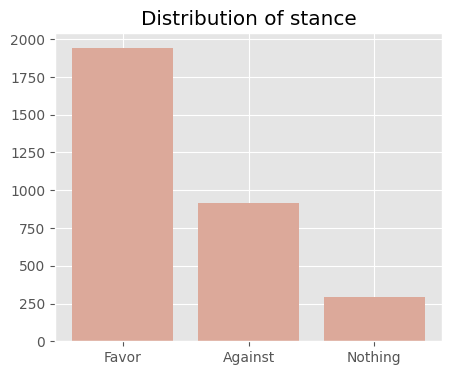

In [ ]:
fig = plt.figure(figsize =(5, 4))
plt.bar(train['stance'].value_counts().index, train['stance'].value_counts(),color ='#DCA99A');
plt.title("Distribution of stance");
plt.savefig("stance.png")

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
from imblearn.metrics import geometric_mean_score

In [ ]:
# Define MY metrics
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='macro')
  acc = accuracy_score(labels, preds)
  precision = precision_score(labels, preds, average='macro')
  recall = recall_score(labels, preds, average='macro')
  g_mean = geometric_mean_score(labels, preds)


  return {'Accuracy Score': acc, 'F1 Score': f1, 'G_Mean': g_mean, 'Precision Score': precision, 'Recall Score': recall}


In [ ]:
print(train['stance'].dtype)
print(train['stance'].unique())

object
['Favor' 'Against' 'Nothing']


In [ ]:
print(test['stance'].dtype)
print(test['stance'].unique())

object
['Against' 'Favor' 'Nothing']


In [ ]:
label_mapping = {'Favor': 0, 'Against': 1, 'Nothing':2}
train['stance'] = train['stance'].map(label_mapping)
val['stance'] = val['stance'].map(label_mapping)
test['stance'] = test['stance'].map(label_mapping)

In [ ]:
train.head()

,ID,text,target,stance
557,665,#نسويات_نشكر_ولي_العهد اكيد نشكره على تمكين ال...,Women empowerment,0
650,776,🔻من الخاص 📩 فيه تطعيم كورونا بالاحساء ٢٤ ساع...,Covid Vaccine,0
1226,1451,والله ماهم احرص ولا يستاهلون حتى نومن عيالنا ...,Covid Vaccine,1
2851,3348,عشان يخلون العالم يطعمون وياخذون من وراهم فلو...,Covid Vaccine,1
2812,3305,MENTION انا مع التطعيمات بجميع أنواع والحمدالل...,Covid Vaccine,0


In [ ]:
test.head()

,ID,text,target,stance
0,2,الوضع صار بالسعوديه يفشل لا عاد فيه شركات صاحي...,Women empowerment,1
1,5,الفساد الإداري انهك البلاد ومازلنا نعتمد عل...,Digital Transformation,0
2,14,-البي بي سي ١٠ دول اوروبية توقف تطعيم اوكسفورد...,Covid Vaccine,1
3,16,منصة مدرستي بتسرع عملية التحول للتعليم الالكتر...,Digital Transformation,0
4,17,انا مع تمكين المرأة اصلا URL,Women empowerment,0


In [ ]:
# Convert labels to tensor
train_labels = train['stance']
val_labels = val['stance']
test_labels = test['stance']

In [ ]:
train.head()

,ID,text,target,stance
557,665,#نسويات_نشكر_ولي_العهد اكيد نشكره على تمكين ال...,Women empowerment,0
650,776,🔻من الخاص 📩 فيه تطعيم كورونا بالاحساء ٢٤ ساع...,Covid Vaccine,0
1226,1451,والله ماهم احرص ولا يستاهلون حتى نومن عيالنا ...,Covid Vaccine,1
2851,3348,عشان يخلون العالم يطعمون وياخذون من وراهم فلو...,Covid Vaccine,1
2812,3305,MENTION انا مع التطعيمات بجميع أنواع والحمدالل...,Covid Vaccine,0


In [ ]:
val.head()

,ID,text,target,stance
3149,3698,"وبعدين تكلمت "" عن القصور المباشر في تمكين جهود...",Women empowerment,0
315,378,ومافي امراة تبربر ع دخل الرجال وفلوسة في زمن ...,Women empowerment,1
2177,2554,MENTION والله يا أم خليفة لنا الحق رفض #تطعيم_...,Covid Vaccine,1
2771,3251,تمكين المرأه موجود من زمن و ولي العهد ماقصر زا...,Women empowerment,0
430,511,المرأة مسكينة المرأة تحتاج دعم المرأة تحتاج تم...,Women empowerment,0


In [ ]:
test.head()

,ID,text,target,stance
0,2,الوضع صار بالسعوديه يفشل لا عاد فيه شركات صاحي...,Women empowerment,1
1,5,الفساد الإداري انهك البلاد ومازلنا نعتمد عل...,Digital Transformation,0
2,14,-البي بي سي ١٠ دول اوروبية توقف تطعيم اوكسفورد...,Covid Vaccine,1
3,16,منصة مدرستي بتسرع عملية التحول للتعليم الالكتر...,Digital Transformation,0
4,17,انا مع تمكين المرأة اصلا URL,Women empowerment,0


In [ ]:
class DialectsDataset(Dataset):
  def __init__(self, encodings, labels):
      self.encodings = encodings
      self.labels = labels.to_list()

  def __getitem__(self, idx):
      item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
      item['labels'] = torch.tensor(int(self.labels[idx]))
      return item

  def __len__(self):
      return len(self.labels)

In [ ]:
#MODEL 1
model1 = AutoModelForSequenceClassification.from_pretrained('UBC-NLP/MARBERTv2', num_labels=3)
tokenizer1 = BertTokenizerFast.from_pretrained('UBC-NLP/MARBERTv2')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Encode text & prepare dataloader
train_encodings1 = tokenizer1(train['text'].to_list(), truncation=True, padding=True, max_length=256)
val_encodings1 = tokenizer1(val['text'].to_list(), truncation=True, padding=True, max_length=256)
test_encodings1 = tokenizer1(test['text'].to_list(), truncation=True, padding=True, max_length=256)

In [ ]:
ds_train1 = DialectsDataset(train_encodings1, train_labels)
ds_val1 =  DialectsDataset(val_encodings1, val_labels)
ds_test1 =  DialectsDataset(test_encodings1, test_labels)

In [ ]:
training_args1 = TrainingArguments(
    output_dir='results',
    num_train_epochs=5,
    learning_rate=0.00001,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=32,
    evaluation_strategy = "epoch",
    save_strategy = 'epoch',
    )

trainer1 = Trainer(
    model=model1,
    args=training_args1,
    train_dataset=ds_train1,
    eval_dataset=ds_val1,
    compute_metrics=compute_metrics,

)

In [ ]:
trainer1.train()


Epoch,Training Loss,Validation Loss,Accuracy score,F1 score,G Mean,Precision score,Recall score
1,No log,0.555588,0.797721,0.636600,0.493257,0.805941,0.628098
2,No log,0.585482,0.794872,0.640710,0.514287,0.720506,0.629466
3,No log,0.600889,0.769231,0.620478,0.514673,0.641142,0.629586
4,No log,0.618164,0.786325,0.639220,0.532708,0.666927,0.630534
5,No log,0.609912,0.783476,0.645482,0.553147,0.667829,0.637775


TrainOutput(global_step=250, training_loss=0.32194100952148436, metrics={'train_runtime': 133.7427, 'train_samples_per_second': 117.801, 'train_steps_per_second': 1.869, 'total_flos': 728675138022300.0, 'train_loss': 0.32194100952148436, 'epoch': 5.0})

In [ ]:
#ds_val1
trainer1.evaluate(ds_val1)

{'eval_loss': 0.6099117398262024,
 'eval_Accuracy Score': 0.7834757834757835,
 'eval_F1 Score': 0.6454819524898389,
 'eval_G_Mean': 0.5531466102012702,
 'eval_Precision Score': 0.6678287297756325,
 'eval_Recall Score': 0.6377753157688433,
 'eval_runtime': 0.7037,
 'eval_samples_per_second': 498.806,
 'eval_steps_per_second': 15.632,
 'epoch': 5.0}

In [ ]:
trainer1.evaluate(ds_test1)

{'eval_loss': 0.6290480494499207,
 'eval_Accuracy Score': 0.789983844911147,
 'eval_F1 Score': 0.6443108996555768,
 'eval_G_Mean': 0.5595898878724013,
 'eval_Precision Score': 0.6623868186368187,
 'eval_Recall Score': 0.638936795850266,
 'eval_runtime': 1.2717,
 'eval_samples_per_second': 486.766,
 'eval_steps_per_second': 15.727,
 'epoch': 5.0}

In [ ]:
#########################

In [ ]:

import sys

def print_usage():
    print("""
---------------------------
Usage:
python StanceEval.py goldFile guessFile

goldFile: file containing gold standards;
guessFile: file containing your prediction.

These two files have the same format:
ID<Tab>Target<Tab>Tweet<Tab>Stance
Only stance labels may be different between them!
---------------------------
""")

if len(sys.argv) == 2 and sys.argv[1] == "-u":
    print_usage()
    sys.exit()

if len(sys.argv) != 3:
    sys.stderr.write("\nError: Number of parameters are incorrect!\n")
    print_usage()
    sys.exit(1)

fn_gold = sys.argv[1]
fn_guess = sys.argv[2]

try:
    with open(fn_gold, 'r') as f_gold, open(fn_guess, 'r') as f_guess:
        gold_lines = f_gold.readlines()
        guess_lines = f_guess.readlines()
except IOError as e:
    sys.stderr.write(f"Error: Cannot open file: {e.filename}\n")
    sys.exit(1)

gold_lines = [line.strip() for line in gold_lines]
guess_lines = [line.strip() for line in guess_lines]

if len(guess_lines) != len(gold_lines):
    sys.stderr.write("\nError: Make sure the number of lines in your prediction file is same as that in the gold-standard file!\n")
    sys.stderr.write(f"The gold-standard file contains {len(gold_lines)} lines, but the prediction file contains {len(guess_lines)} lines.\n")
    sys.exit(1)

targets = ["Women empowerment", "Covid Vaccine", "Digital Transformation"]
cats = ["FAVOR", "AGAINST", "NONE"]

# Initialize dictionaries to store statistics for each target
num_of_true_pos_of_each_target = {target: {cat: 0 for cat in cats} for target in targets}
num_of_guess_of_each_target = {target: {cat: 0 for cat in cats} for target in targets}
num_of_gold_of_each_target = {target: {cat: 0 for cat in cats} for target in targets}

for gold_line, guess_line in zip(gold_lines, guess_lines):
    if gold_line == "ID\tTarget\tTweet\tStance":
        continue

    gold_arr = gold_line.split("\t")
    guess_arr = guess_line.split("\t")

    if len(gold_arr) != 4:
        sys.stderr.write(f"\nError: the following line in the gold-standard file does not have a correct format:\n\n{gold_line}\n\n")
        sys.stderr.write("Correct format: ID<Tab>Target<Tab>Tweet<Tab>Stance\n")
        sys.exit(1)

    if len(guess_arr) != 4:
        sys.stderr.write(f"\nError: the following line in your prediction file does not have a correct format:\n\n{guess_line}\n\n")
        sys.stderr.write("Correct format: ID<Tab>Target<Tab>Tweet<Tab>Stance\n")
        sys.exit(1)

    gold_target = gold_arr[1]
    gold_lbl = gold_arr[3]
    guess_target = guess_arr[1]
    guess_lbl = guess_arr[3]

    if gold_target not in targets:
        sys.stderr.write(f"\nError: the target \"{gold_target}\" in the gold-standard file is invalid:\n\n{gold_line}\n\n")
        sys.exit(1)

    if guess_target not in targets:
        sys.stderr.write(f"\nError: the target \"{guess_target}\" in the prediction file is invalid:\n\n{guess_line}\n\n")
        sys.exit(1)

    if gold_lbl not in cats:
        sys.stderr.write(f"\nError: the stance label \"{gold_lbl}\" in the gold-standard file is invalid:\n\n{gold_line}\n\n")
        sys.exit(1)

    if guess_lbl not in cats:
        sys.stderr.write(f"\nError: the stance label \"{guess_lbl}\" in the prediction file is invalid:\n\n{guess_line}\n\n")
        sys.exit(1)

    num_of_gold_of_each_target[gold_target][gold_lbl] += 1
    num_of_guess_of_each_target[guess_target][guess_lbl] += 1

    if guess_lbl == gold_lbl:
        num_of_true_pos_of_each_target[guess_target][guess_lbl] += 1

prec_by_target = {target: {cat: 0 for cat in cats} for target in targets}
recall_by_target = {target: {cat: 0 for cat in cats} for target in targets}
f_by_target = {target: {cat: 0 for cat in cats} for target in targets}
macro_f_by_target = {target: 0.0 for target in targets}

for target in targets:
    macro_f = 0.0
    n_cat = 0

    for cat in cats:
        n_tp = num_of_true_pos_of_each_target[target][cat]
        n_guess = num_of_guess_of_each_target[target][cat]
        n_gold = num_of_gold_of_each_target[target][cat]

        p = 0
        r = 0
        f = 0

        if n_guess != 0:
            p = n_tp / n_guess
        if n_gold != 0:
            r = n_tp / n_gold
        if p + r != 0:
            f = 2 * p * r / (p + r)

        prec_by_target[target][cat] = p
        recall_by_target[target][cat] = r
        f_by_target[target][cat] = f

        if cat in ["FAVOR", "AGAINST"]:
            n_cat += 1
            macro_f += f

    macro_f = macro_f / n_cat
    macro_f_by_target[target] = macro_f

    # Print results for each target
    print(f"\n\n============\nResults for Target: {target}\n============")
    for cat in cats:
        if cat in ["FAVOR", "AGAINST"]:
            print(f"{cat:<9} precision: {prec_by_target[target][cat]:.4f} recall: {recall_by_target[target][cat]:.4f} f-score: {f_by_target[target][cat]:.4f}")
    print("------------")
    print(f"Macro F: {macro_f:.4f}\n\n")

# Compute overall macro F1-score across all targets
overall_macro_f = sum(macro_f_by_target.values()) / len(targets)
print(f"\n\n============\nOverall Macro F1-score across all targets: {overall_macro_f:.4f}\n============\n")
StanceEval.py
Displaying StanceEval.py.

SyntaxError: invalid syntax (<ipython-input-131-936164fbde19>, line 146)